In [132]:
import os
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Loading Data

In [110]:
DATA_PATH = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data/toy_data.csv")

In [111]:
df = pd.read_csv(DATA_PATH)

In [112]:
cols_raw = list(df.columns)
cols_trash = ['Unnamed: 0', 'converged', 'accuracy']
cols_independent = ['total_energy']
cols_drop = cols_trash + cols_independent

cols_dependent = cols_raw.copy()
for element in cols_drop:
    cols_dependent.remove(element)


In [113]:
X_raw = df[cols_dependent]
y_raw = df[cols_independent]

# Train-Test-Split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw,
    test_size=0.1,
    random_state=42)

# Pipeline Definition

## Linear Model with polynomial feature augmentation

In [188]:
def exp_decay(x, lambda_):
    return np.exp(-lambda_*x)

In [189]:
#DEFINITION OF PREPROCESSING STEPS
scaler = StandardScaler()
poly_augmentation = PolynomialFeatures(degree=3)

lambda_ = 1
exp_decay_augmentation = FunctionTransformer(lambda x : exp_decay(x, lambda_))

In [190]:
#DEFINITION OF REGRESSOR
linear_regressor = LinearRegression()
#regressor = GradientBoostingRegressor

In [191]:
#COMBINING EVERYTHING TO A PIPELINE
simple_model = Pipeline([
    ('poly', poly_augmentation),
    #('exp_decay', exp_decay_augmentation),
    ('scaler', scaler),
    ('regressor', linear_regressor)
])

In [192]:
simple_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [193]:
mse_test = mean_squared_error(y_test, simple_model.predict(X_test))
mse_train = mean_squared_error(y_train, simple_model.predict(X_train))
print(f"MSE:\ttrain:{mse_train}\ttest:{mse_test}")

MSE:	train:0.007879802558205246	test:0.009377753097521532


In [194]:
mape_test = mean_absolute_percentage_error(y_test, simple_model.predict(X_test))
mape_train = mean_absolute_percentage_error(y_train, simple_model.predict(X_train))
print(f"MAPE:\ttrain:{mape_train}\ttest:{mape_test}")

MAPE:	train:0.0002839384879951435	test:0.00031199446426135105


## Random Forest

In [195]:
rf_regressor = RandomForestRegressor()
rf_model = Pipeline([
    ('poly', poly_augmentation),
    ('scaler', scaler),
    ('regressor', rf_regressor)
])

In [196]:
rf_model.fit(X_train, y_train)

/Users/philipp/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [197]:
mse_test = mean_squared_error(y_test, rf_model.predict(X_test))
mse_train = mean_squared_error(y_train, rf_model.predict(X_train))
print(f"MSE:\ttrain:{mse_train}\ttest:{mse_test}")

MSE:	train:5.311762658475805e-07	test:1.4722142752371238e-06


In [198]:
mape_test = mean_absolute_percentage_error(y_test, rf_model.predict(X_test))
mape_train = mean_absolute_percentage_error(y_train, rf_model.predict(X_train))
print(f"MAPE:\ttrain:{mape_train}\ttest:{mape_test}")

MAPE:	train:5.986373891929295e-07	test:1.7710840705354804e-06


# Visualization

In [199]:
for a, b in zip(y_test["total_energy"], simple_model.predict(X_test)):
    print(f"{a:.2E}\t{float(b):.2E}")

-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.40E+02
-2.40E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02


In [200]:
for a, b in zip(y_test["total_energy"], rf_model.predict(X_test)):
    print(f"{a:.2E}\t{b:.2E}")

-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.39E+02	-2.39E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02
-2.40E+02	-2.40E+02


In [201]:
import matplotlib.pyplot as plt

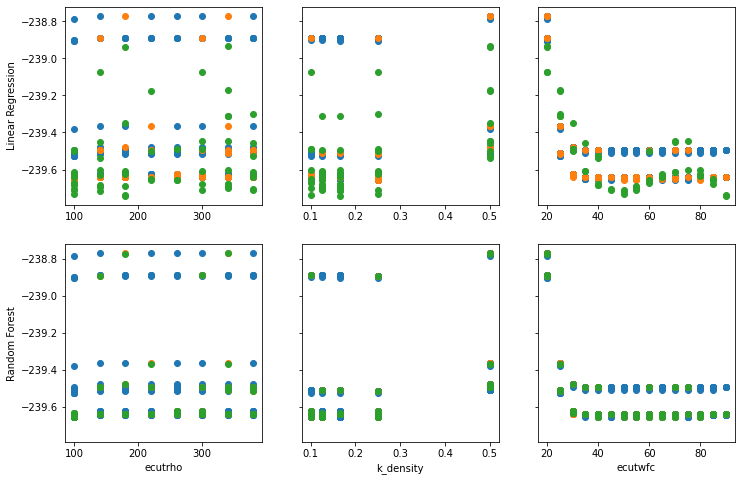

In [212]:
fig, ax = plt.subplots(2,3,figsize=(12,8), sharey=True)
models = [simple_model, rf_model]
for j, model in enumerate(models):
    for i, col in enumerate(X_train.columns[:3]):
        ax[j,i].scatter(X_train[col], y_train)
        ax[j,i].scatter(X_test[col], y_test)
        ax[j,i].scatter(X_test[col], model.predict(X_test))
ax[0,0].set_ylabel("Linear Regression")
ax[1,0].set_ylabel("Random Forest")
ax[1,0].set_xlabel("ecutrho")
ax[1,1].set_xlabel('k_density')
ax[1,2].set_xlabel('ecutwfc')
PLOTPATH = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "plots/simple_regression/toy_comparison.png")
plt.savefig(PLOTPATH)

<Figure size 432x288 with 0 Axes>